In [1]:
from defectlib import load_tensors
from defectlib import Config
from matplotlib import image
from IPython.display import Image
import matplotlib.pyplot as plt
import defectlib
import cv2
import numpy as np
%matplotlib inline

Using TensorFlow backend.


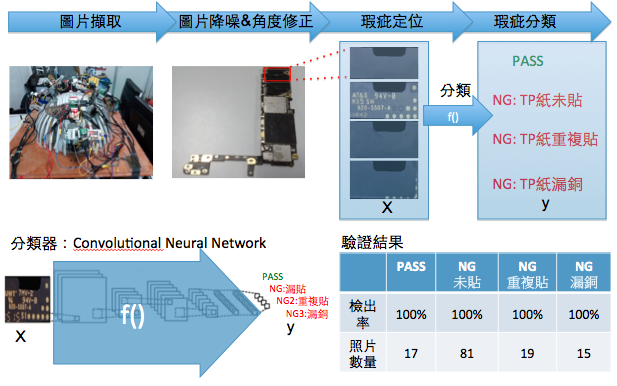

In [2]:
Image(filename='./images/defect_overview.png')

__原始檔案路徑__

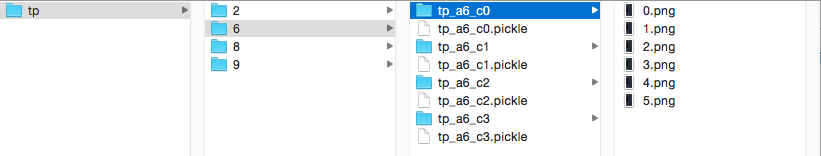

In [3]:
Image(filename='./images/image_files.png')

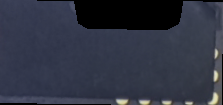

In [4]:
Image(filename='./defect_tensors/tp/9/tp_a9_c3/1.png')

In [5]:
testImage = cv2.imread('./defect_tensors/tp/9/tp_a9_c1/1.png')

In [6]:
testImage

array([[[104,  79,  79],
        [106,  81,  81],
        [104,  81,  81],
        ..., 
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[105,  82,  82],
        [107,  84,  84],
        [108,  87,  86],
        ..., 
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[107,  87,  86],
        [109,  88,  86],
        [111,  90,  88],
        ..., 
        [ 92,  82,  79],
        [ 90,  81,  77],
        [ 95,  82,  80]],

       ..., 
       [[100,  81,  87],
        [104,  83,  85],
        [106,  84,  85],
        ..., 
        [ 98,  98, 103],
        [103, 100,  99],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ..., 
        [ 97,  98, 103],
        [101, 101, 100],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ..., 
        [ 99,  96,  99],
        [101,  95,  98],
        [  0,   0,

In [7]:
testImage.shape

(105, 223, 3)

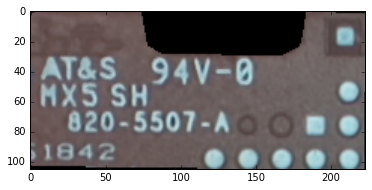

In [8]:
plt.imshow(testImage)

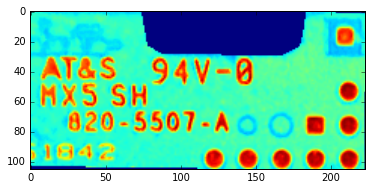

In [9]:
plt.imshow(testImage[:,:,1])

In [10]:
testImage

array([[[104,  79,  79],
        [106,  81,  81],
        [104,  81,  81],
        ..., 
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[105,  82,  82],
        [107,  84,  84],
        [108,  87,  86],
        ..., 
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[107,  87,  86],
        [109,  88,  86],
        [111,  90,  88],
        ..., 
        [ 92,  82,  79],
        [ 90,  81,  77],
        [ 95,  82,  80]],

       ..., 
       [[100,  81,  87],
        [104,  83,  85],
        [106,  84,  85],
        ..., 
        [ 98,  98, 103],
        [103, 100,  99],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ..., 
        [ 97,  98, 103],
        [101, 101, 100],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ..., 
        [ 99,  96,  99],
        [101,  95,  98],
        [  0,   0,

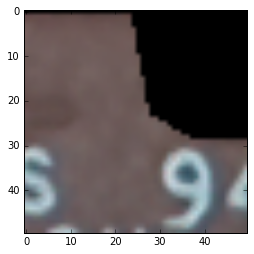

In [11]:
plt.imshow(testImage[0:50, 50:100])

__影像分類 Step by Step__

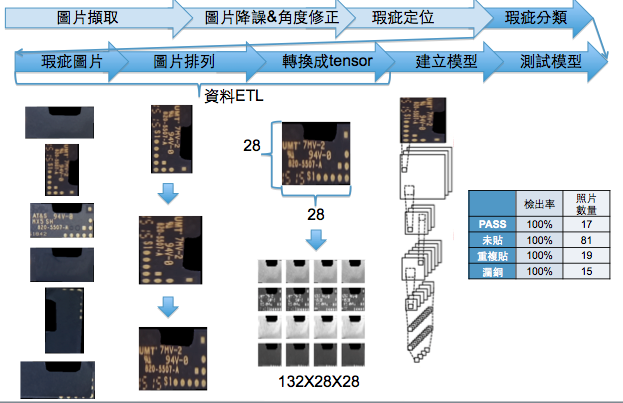

In [12]:
Image(filename='./images/ETL.png')

__Step1. 影像資料ETL__

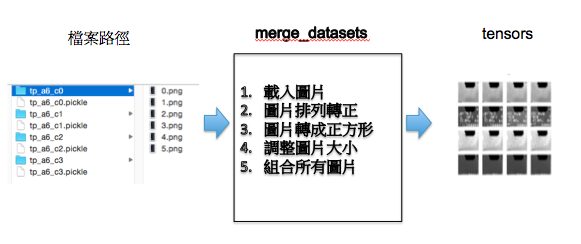

In [13]:
Image(filename='./images/initial_ETL.png')

In [14]:
tensor9, label9, sn9 = load_tensors('./defect_tensors/TP_Paper/9A/', width=256)

(66, 154, 276)
(31, 154, 276)
(14, 154, 276)
(14, 154, 276)


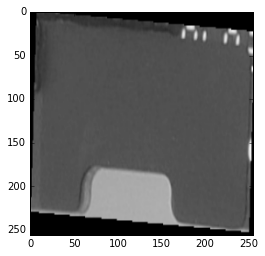

In [15]:
plt.imshow(tensor9[2], cmap='gray')

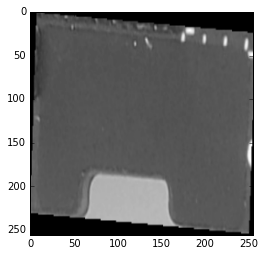

In [16]:
plt.imshow(tensor9[45], cmap='gray')

In [17]:
tensor2, label2, sn2 = load_tensors('./defect_tensors/TP_Paper/2A/', width=256)

(126, 242, 140)
(17, 242, 140)
(8, 242, 140)
(2, 242, 140)


In [18]:
tensor8, label8, sn8 = load_tensors('./defect_tensors/TP_Paper/8A/', width=256)

(54, 297, 166)
(51, 297, 166)
(18, 297, 166)
(18, 297, 166)


In [19]:
tensor6, label6, sn6 = load_tensors('./defect_tensors/TP_Paper/6A/', width=256)

(125, 157, 267)
(4, 157, 267)
(9, 157, 267)
(1, 157, 267)


__確認載入的圖片是否有問題?__

In [20]:
from defectlib import display_tensor

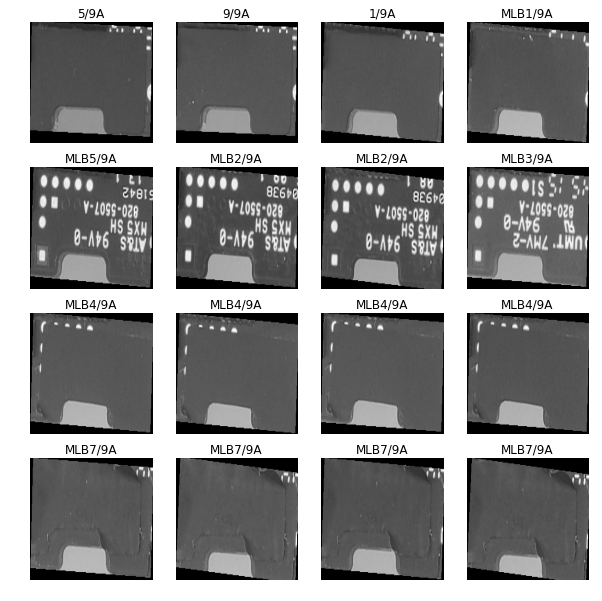

In [21]:
display_tensor(tensor9, label9, sn9)

__合併所有角度的照片__

In [22]:
from defectlib import combine_shuffle_tensors

In [23]:
for tensor in (tensor2, tensor6, tensor8, tensor9):
    print tensor.shape

(153, 256, 256)
(139, 256, 256)
(141, 256, 256)
(125, 256, 256)


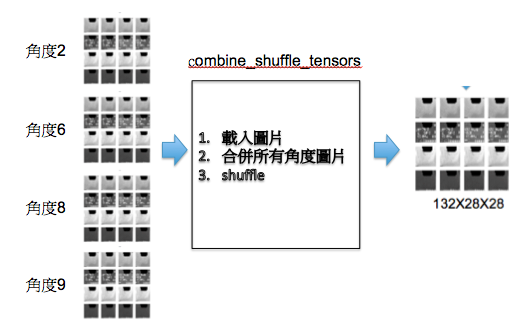

In [24]:
Image(filename='./images/combine_shuffle_tensors.png')

In [25]:
all_tensor, all_label, all_sn = combine_shuffle_tensors((tensor2, label2, sn2),
                                                       (tensor6, label6, sn6),
                                                       (tensor8, label8, sn8),
                                                       (tensor9, label9, sn9))

the final tensor should be 558
number of class 0: 371
	number of SN: 15
number of class 1: 103
	number of SN: 3
number of class 2: 49
	number of SN: 1
number of class 3: 35
	number of SN: 1


In [26]:
for label in set(all_label):
    print 'the number of class {}: {}'.format(label, all_tensor[all_label == label].shape[0])

the number of class 0: 371
the number of class 1: 103
the number of class 2: 49
the number of class 3: 35


In [27]:
all_tensor.shape

(558, 256, 256)

In [28]:
all_label.shape

(558,)

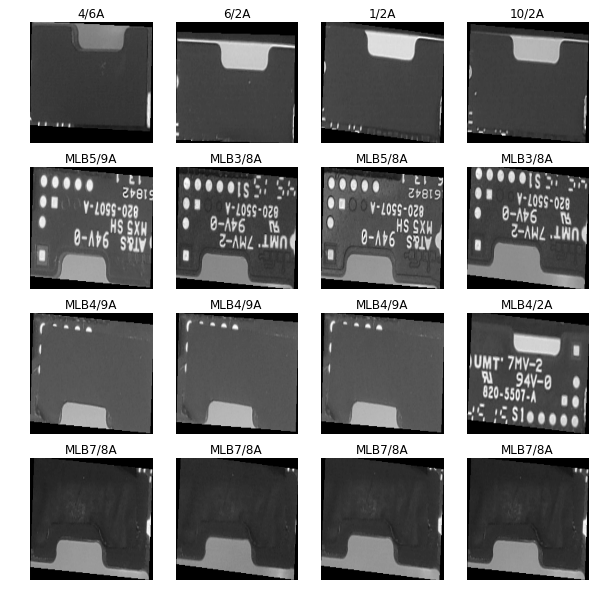

In [30]:
display_tensor(all_tensor, all_label, all_sn)

__開始建立模型__

In [31]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Flatten, Activation
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.utils import np_utils

In [32]:
list(set(all_label))

[0, 1, 2, 3]

In [33]:
labels_ohe = np_utils.to_categorical(all_label)

In [34]:
labels_ohe

array([[ 1.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.],
       [ 0.,  1.,  0.,  0.],
       ..., 
       [ 1.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.]])

In [35]:
all_tensor.shape

(558, 256, 256)

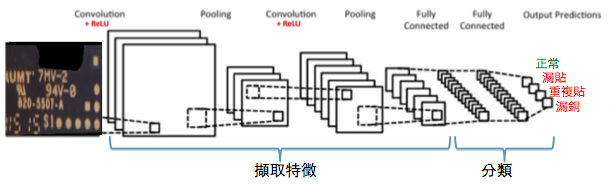

In [36]:
Image(filename='./images/CNN.png')

In [61]:
model = Sequential()

# Convolution2D(number_filters, row_size, column_size, input_shape=(number_channels, img_row, img_col))

model.add(Convolution2D(6, 5, 5, input_shape=(256, 256, 1), border_mode='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(16, 5, 5, border_mode='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(120, 5, 5))
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(84))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(4))
model.add(Activation('softmax'))

In [62]:
model.compile(loss='categorical_crossentropy', optimizer='adadelta', metrics=["accuracy"])

In [63]:
combined_tensor8, combined_label8, combined_sn8 = combine_shuffle_tensors((tensor2, label2, sn2), 
                                                                         (tensor6, label6, sn6),
                                                                         (tensor9, label9, sn9))

the final tensor should be 417
number of class 0: 317
	number of SN: 15
number of class 1: 52
	number of SN: 3
number of class 2: 31
	number of SN: 1
number of class 3: 17
	number of SN: 1


In [64]:
train_data = combined_tensor8.reshape(combined_tensor8.shape[0], combined_tensor8.shape[1], combined_tensor8.shape[2], 1)

In [65]:
train_data.shape

(417, 256, 256, 1)

In [66]:
train_labels = np_utils.to_categorical(combined_label8)

In [67]:
test_data = tensor8.reshape(tensor8.shape[0], tensor8.shape[1], tensor8.shape[2], 1)

In [68]:
test_labels = np_utils.to_categorical(label8)

In [69]:
%time
nb_epoch = 10  # try increasing this number
model.fit(train_data, train_labels, batch_size=10, nb_epoch=nb_epoch,
          show_accuracy=True, verbose=1, validation_data=(test_data, test_labels))
score = model.evaluate(test_data, test_labels, show_accuracy=True, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

CPU times: user 3 µs, sys: 3 µs, total: 6 µs
Wall time: 8.82 µs
Train on 417 samples, validate on 141 samples
Epoch 1/10
417/417 [==============================] - 69s - loss: 0.6262 - acc: 0.8129 - val_loss: 0.8284 - val_acc: 0.7447
Epoch 2/10
417/417 [==============================] - 66s - loss: 0.3379 - acc: 0.9137 - val_loss: 0.5481 - val_acc: 0.8156
Epoch 3/10
417/417 [==============================] - 66s - loss: 0.1746 - acc: 0.9329 - val_loss: 0.7005 - val_acc: 0.8156
Epoch 4/10
417/417 [==============================] - 66s - loss: 0.0794 - acc: 0.9712 - val_loss: 0.6886 - val_acc: 0.8227
Epoch 5/10
417/417 [==============================] - 66s - loss: 0.0676 - acc: 0.9736 - val_loss: 0.8805 - val_acc: 0.8156
Epoch 6/10
417/417 [==============================] - 66s - loss: 0.0402 - acc: 0.9904 - val_loss: 0.8275 - val_acc: 0.8440
Epoch 7/10
417/417 [==============================] - 66s - loss: 0.0432 - acc: 0.9880 - val_loss: 0.7888 - val_acc: 0.8369
Epoch 8/10
417/417 [==

/Users/hadoop1/.virtualenvs/cv/lib/python2.7/site-packages/keras/models.py:651: UserWarning: The "show_accuracy" argument is deprecated, instead you should pass the "accuracy" metric to the model at compile time:
`model.compile(optimizer, loss, metrics=["accuracy"])`
  warnings.warn('The "show_accuracy" argument is deprecated, '


('Test score:', 1.2729044203904081)
('Test accuracy:', 0.83687943262411346)
